<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/Dogs_vs_Cats_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog and Cat Training

## 犬猫学習プログラム

本サンプルは Keras (Tensorflow) を用いて犬と猫の画像を学習します。

## データを準備

まず、data.zip を入手します。(wget か手動のいずれか)

https://drive.google.com/open?id=1FISoJ5BKEU6kiMfdWS9jaJYBpBWwCPwI

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FISoJ5BKEU6kiMfdWS9jaJYBpBWwCPwI' -O data.zip

次に、ファイルタブを開いて data.zip をアップロードします。

（数分かかります）

In [0]:
# data.zip を解凍しましょう

!unzip data.zip

In [3]:
# https://medium.com/@parthvadhadiya424/hello-world-program-in-keras-with-cnn-dog-vs-cat-classification-efc6f0da3cc5

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

# dimensions of our images.
img_width, img_height = 150, 150

# Initialising the CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2))) # Pooling

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
62
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
62/62 [==============================] - 60s 961ms/step - loss: 0.7014 - acc: 0.4839 - val_loss: 0.6909 - val_acc: 0.5272
Epoch 2/50
62/62 [==============================] - 60s 962ms/step - loss: 0.7073 - acc: 0.5262 - val_loss: 0.6738 - val_acc: 0.5544
Epoch 3/50
62/62 [==============================] - 59s 956ms/step - loss: 0.6757 - acc: 0.5958 - val_loss: 0.6483 - val_acc: 0.6048
Epoch 4/50
62/62 [==============================] - 59s 952ms/step - loss: 0.6687 - acc: 0.6058 - val_loss: 0.6180 - val_acc: 0.6411
Epoch 5/50
62/62 [==============================] - 60s 961ms/step - loss: 0.6495 - acc: 0.6492 - val_loss: 0.6237 - val_acc: 0.6230
Epoch 6/50
62/62 [==============================] - 60s 961ms/step - loss: 0.6032 - acc: 0.6542 - val_loss: 0.6256 - val_acc: 0.6663
Epoch 7/50
62/62 [==============================] - 59s 958ms/step 

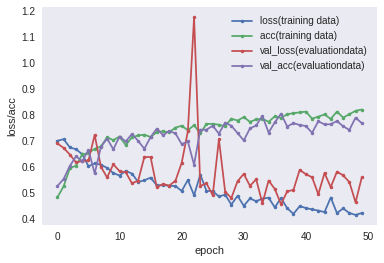

saved model..! ready to go.


In [4]:
#https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import matplotlib.pyplot as plt

# dimensions of our images.
#img_width, img_height = 50, 50

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1000
nb_validation_samples = 1000
epochs = 50
batch_size = 16

train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_data = ImageDataGenerator(rescale = 1./255)

train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_data.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary')

print(nb_validation_samples // batch_size)

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

# 学習結果を表示
loss = hist.history['loss']
acc = hist.history['acc']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), acc, marker='.', label='acc(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("saved model..! ready to go.")


Loaded model from disk
[[0.]]


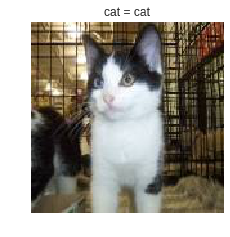

[[0.]]


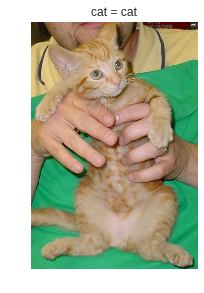

[[0.]]


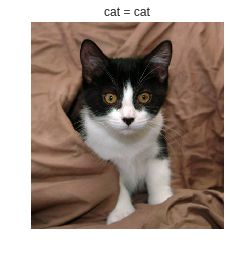

[[0.]]


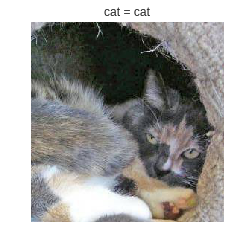

[[0.]]


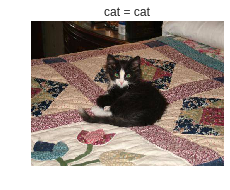

[[0.]]


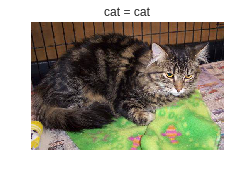

[[0.]]


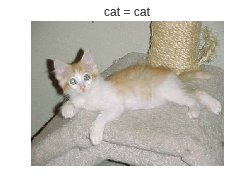

[[0.]]


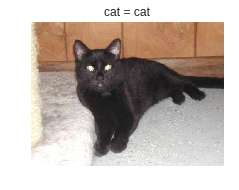

[[1.]]


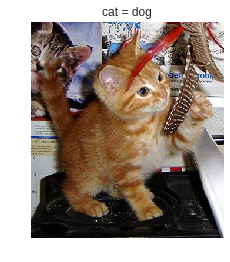

[[0.]]


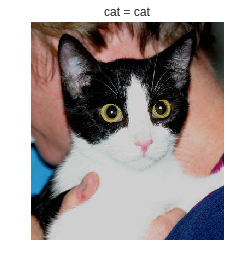

[[0.]]


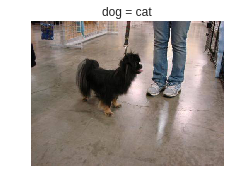

[[1.]]


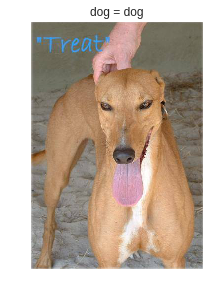

[[1.]]


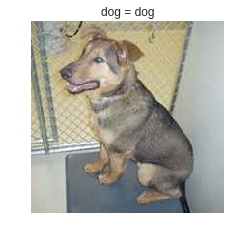

[[1.]]


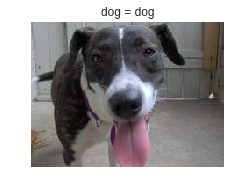

[[1.]]


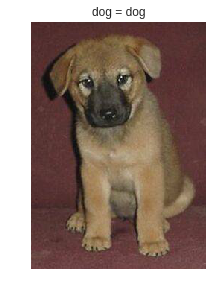

[[1.]]


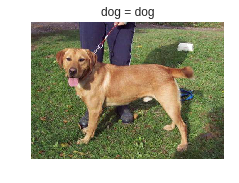

[[1.]]


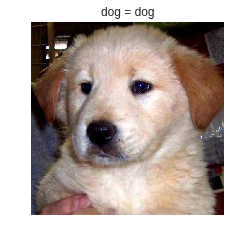

[[0.]]


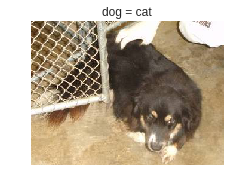

[[0.]]


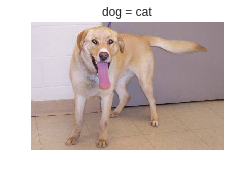

[[1.]]


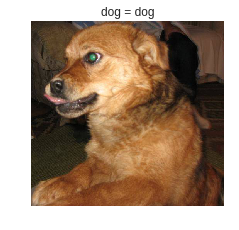

In [5]:
#https://github.com/parthvadhadiya/classify_dogs-vs-cats_using_keras/blob/master/use_model.py

from keras.models import model_from_json
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('model.h5')
print("Loaded model from disk")

'''loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
'''
loaded_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# dimensions of our images.
#img_width, img_height = 50, 50

# 画像表示のための関数
def showimg(filename, title, i):
    im = Image.open(filename)
    im_list = np.asarray(im)
    plt.subplot(2, 5, i)
    plt.title(title)
    plt.axis("off")
    plt.imshow(im_list)

# 画像判定のための関数
def predictimg(filename, featuresize):
    img = image.load_img(filename, target_size = (img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    #preds = model.predict(preprocess_input(x))
    preds = model.predict(x)
    #results = decode_predictions(preds, top = featuresize)[0]
    #return results
    return preds

# 画像を判定
def predict(filename, label):
    results = predictimg(filename, 10)
    print(results)
    if results[0][0] == 1:
        label += ' = dog'
    else:
        label += ' = cat'
    plt.figure(figsize = (20, 10))
    showimg(filename, label, 1)
    plt.show()
    
predict('data/validation/cats/cat.1000.jpg', 'cat')
predict('data/validation/cats/cat.1001.jpg', 'cat')
predict('data/validation/cats/cat.1002.jpg', 'cat')
predict('data/validation/cats/cat.1003.jpg', 'cat')
predict('data/validation/cats/cat.1004.jpg', 'cat')
predict('data/validation/cats/cat.1005.jpg', 'cat')
predict('data/validation/cats/cat.1006.jpg', 'cat')
predict('data/validation/cats/cat.1007.jpg', 'cat')
predict('data/validation/cats/cat.1008.jpg', 'cat')
predict('data/validation/cats/cat.1009.jpg', 'cat')

predict('data/validation/dogs/dog.1000.jpg', 'dog')
predict('data/validation/dogs/dog.1001.jpg', 'dog')
predict('data/validation/dogs/dog.1002.jpg', 'dog')
predict('data/validation/dogs/dog.1003.jpg', 'dog')
predict('data/validation/dogs/dog.1004.jpg', 'dog')
predict('data/validation/dogs/dog.1005.jpg', 'dog')
predict('data/validation/dogs/dog.1006.jpg', 'dog')
predict('data/validation/dogs/dog.1007.jpg', 'dog')
predict('data/validation/dogs/dog.1008.jpg', 'dog')
predict('data/validation/dogs/dog.1009.jpg', 'dog')

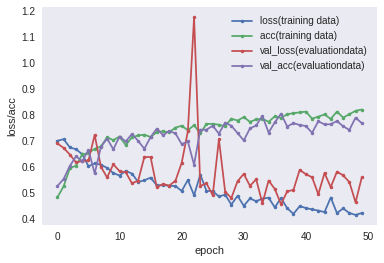

In [6]:
# 学習結果を表示
loss = hist.history['loss']
acc = hist.history['acc']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), acc, marker='.', label='acc(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
